# Alienation

*ATP, Acetylecholine, Adenosine for a fractal, the iterative node, as well as the entire hidden layer including adversarial, iterative, and cooperative nodes*

![](https://www.singulart.com/blog/wp-content/uploads/2019/08/tour_img-312981-148.jpg)

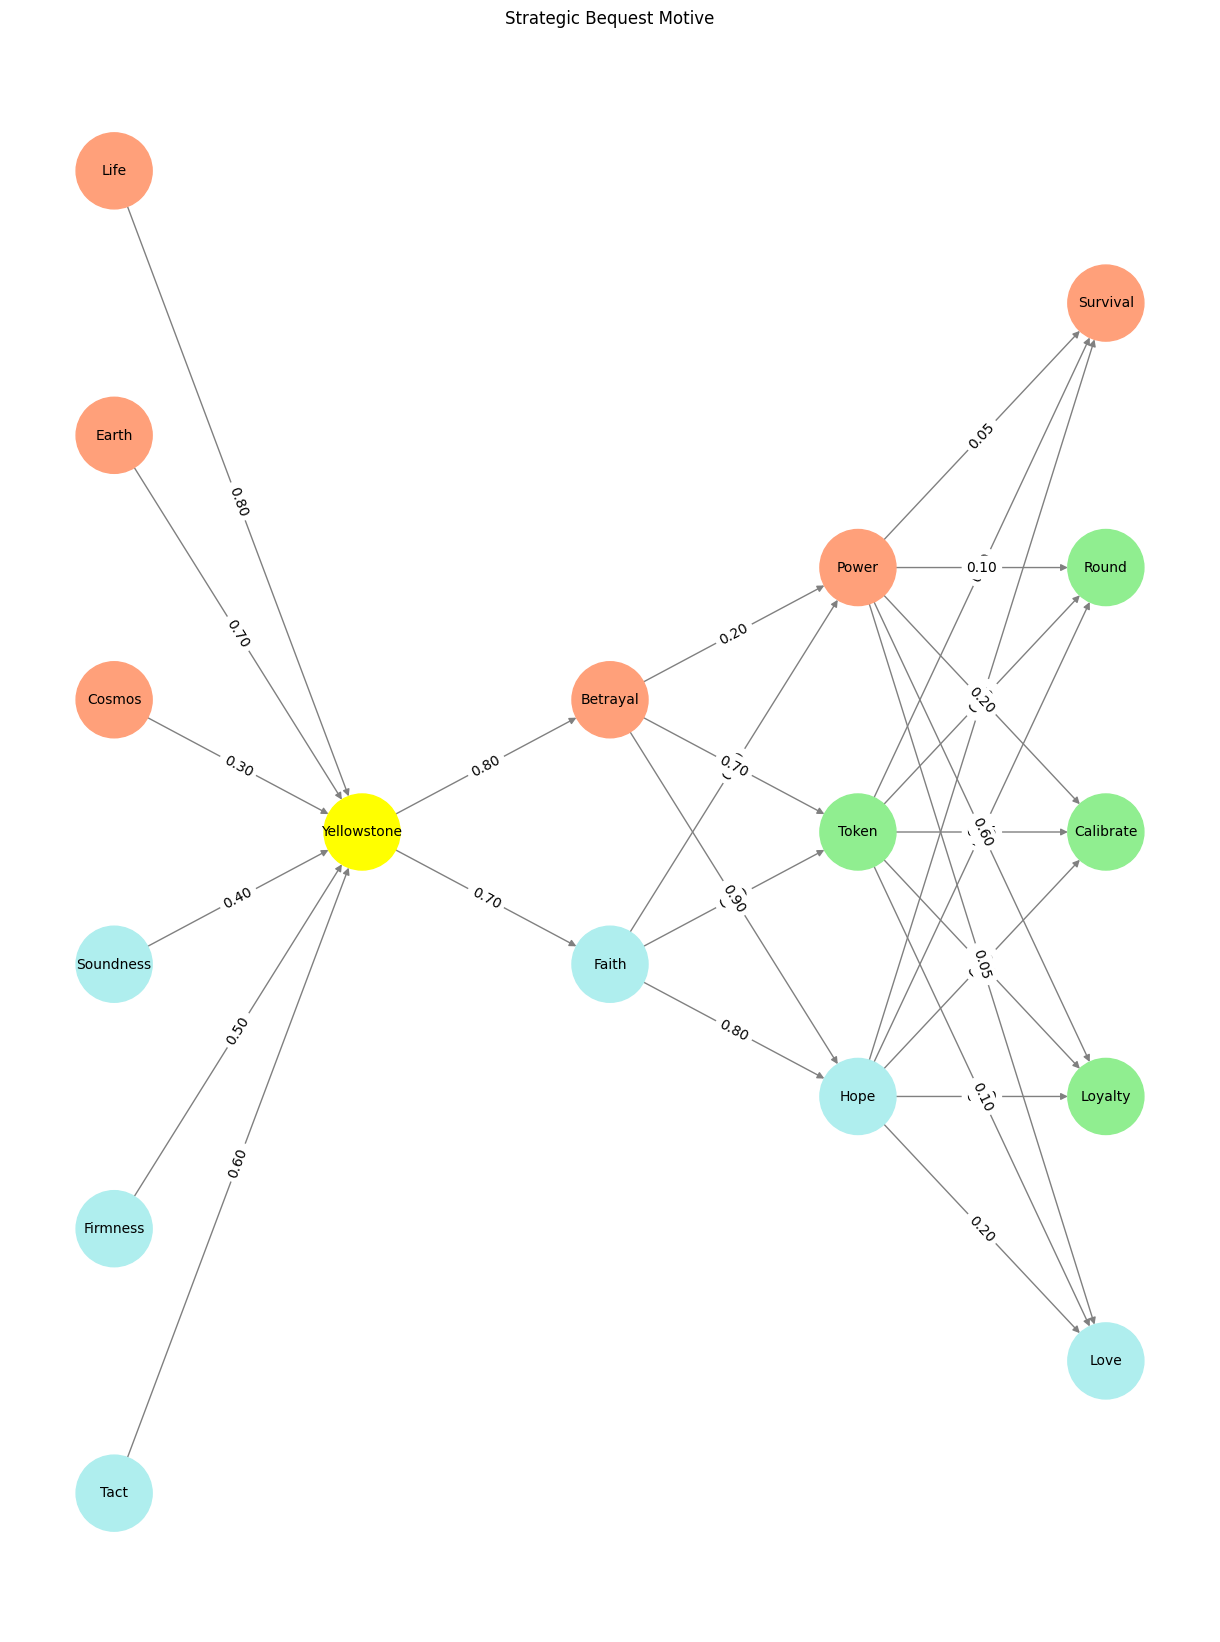

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Tact', 'Firmness', 'Soundness', 'Cosmos', 'Earth', 'Life'],
        'Yellowstone': ['Yellowstone'],
        'Input': ['Faith', 'Betrayal'],
        'Hidden': [
            'Hope',
            'Token',
            'Power',
        ],
        'Output': ['Love', 'Loyalty', 'Calibrate', 'Round', 'Survival']
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Yellowstone':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Tact', 'Firmness', 'Soundness']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Faith':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Hope':
            return 'paleturquoise'
        elif node == 'Token':
            return 'lightgreen'
        elif node == 'Power':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Love':
            return 'paleturquoise'
        elif node in ['Loyalty', 'Calibrate', 'Round']:
            return 'lightgreen'
        elif node == 'Survival':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Strategic Bequest Motive")
    plt.show()

# Run the visualization
visualize_nn()

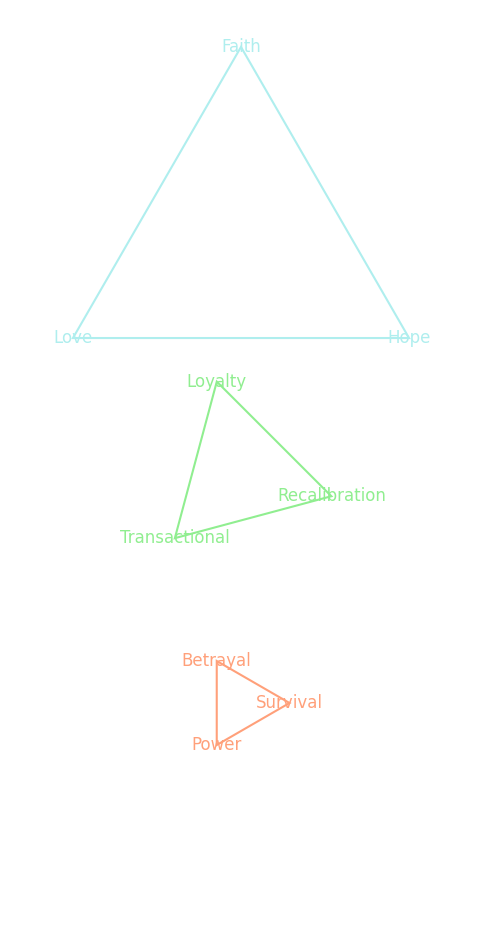

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_triangle(ax, vertices, labels, color='black'):
    """Draws a triangle given vertices and labels for each vertex with matching color."""
    triangle = plt.Polygon(vertices, edgecolor=color, fill=None, linewidth=1.5)
    ax.add_patch(triangle)
    for i, (x, y) in enumerate(vertices):
        ax.text(x, y, labels[i], fontsize=12, ha='center', va='center', color=color)  # Set label color

def get_triangle_vertices_3d(center, radius, perspective_scale, tilt):
    """
    Returns the vertices of a tilted equilateral triangle for a 3D effect.
    `perspective_scale` shrinks the triangle to simulate depth.
    `tilt` applies a slight rotation for perspective effect.
    """
    angles = np.linspace(0, 2 * np.pi, 4)[:-1] + np.pi/2  # angles for vertices of an equilateral triangle
    vertices = np.column_stack([center[0] + radius * perspective_scale * np.cos(angles + tilt),
                                center[1] + radius * perspective_scale * np.sin(angles + tilt)])
    return vertices

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the width and height as needed

ax.set_aspect('equal')

# Define the centers for each triangle, shifting each down from the previous
centers = [(0, 10), (0, 0), (0, -10)]  # Blue at the top, green in the middle, red at the bottom
radii = [6, 4.5, 3]  # Adjusting radii for each layer
triads = [
    ['Faith', 'Love', 'Hope'],          # Blue topmost triangle
    ['Loyalty', 'Transactional', 'Recalibration'],  # Green middle triangle
    ['Betrayal', 'Power', 'Survival']    # Red bottom triangle
]

# Set the color scheme: blue, green, red
colors = ['paleturquoise', 'lightgreen', 'lightsalmon']

# 3D perspective parameters: smaller scale as the fractal moves inward (simulating depth)
scales = [1.4, 0.9, 0.7]  # simulate depth
tilts = [0, np.pi / 12, np.pi / 6]  # slight rotation for perspective

# Draw the triangles with increasing radius and perspective scaling
for center, radius, triad, color, scale, tilt in zip(centers, radii, triads, colors, scales, tilts):
    vertices = get_triangle_vertices_3d(center, radius, scale, tilt)
    draw_triangle(ax, vertices, triad, color=color)

# Set limits and hide axes to fit the frame
ax.set_xlim(-10, 10)
ax.set_ylim(-20, 20)
ax.axis('off')

# Save the plot as 'logo.png'
# plt.savefig('figures/logo.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
The interplay of molecular equilibria aligns closely with the three forces of rhythm, chords, and melody. **Cooperative/Rhythm** is driven by oxytocin, endorphin, and serotonin, fostering emotional bonding, cyclical harmony, and trust. Oxytocin, mimicked by MDMA ("ecstasy"), amplifies social bonding and euphoria through its stimulation of serotonin pathways. **Iterative/Chords** relies on GABA, adenosine, and melatonin, molecules that regulate balance, rest, and homeostasis through cyclical -diurnal- recalibration. **Adversarial/Conflict** engages glutamate, adrenaline, and cortisol, which incite tension and prepare systems for transformation. Noradrenaline sharpens focus during adversarial challenges, dopamine incentivizes tokenization through rewards, and serotonin, interwoven across forces, stabilizes embodiment by integrating rhythm and meaning. This biochemical choreography reflects the fractal complexity of human systems. {cite}`alighieri1984inferno` {Cite}`alighieri1984purgatorio` {cite}`alighieri1984paradiso`
```